In [86]:
using Plots, LaTeXStrings, JSON, Distributions
# Establishing Imports
include("diffusion.jl")
include("run_and_tumble.jl")

using .Diffusion, .RunAndTumble

# Plotting defaults
default(title="", ylabel="y label", xlabel="x label", linewidth=1.5, guidefontsize=15, legendfontsize=11,
    # guidefont=(15, "Computer Modern"), tickfont=(11, "Computer Modern"), legendfont=(11, "Computer Modern"),
    size=(800, 600), dpi=600, margin=8Plots.mm, framestyle=:box)


# const DARKBLUE = "#084081"
# const BLUE1 = "#2b8cbe"
# const BLUE2 = "#4eb3d3"
# const BLUE3 = "#7bccc4"
# const LIGHTGREEN = "#a8ddb5"

const DARKBLUE = "#253494"
const BLUE1 = "#225ea8"
const BLUE2 = "#1d91c0"
const BLUE3 = "#7fcdbb"
const LIGHTGREEN = "#c7e9b4"

log_range = (start, stop, length) -> 10 .^ (range(log10(start), log10(stop), length))

# :==== TITLE TEMPLATE ====:

# TIPS:
# 4x3 aspect ratio
# labels approx same size as caption font
# 800, 600 gets placed at 0.8 page width

#177 (generic function with 1 method)

GKS: could not find font centre.ttf


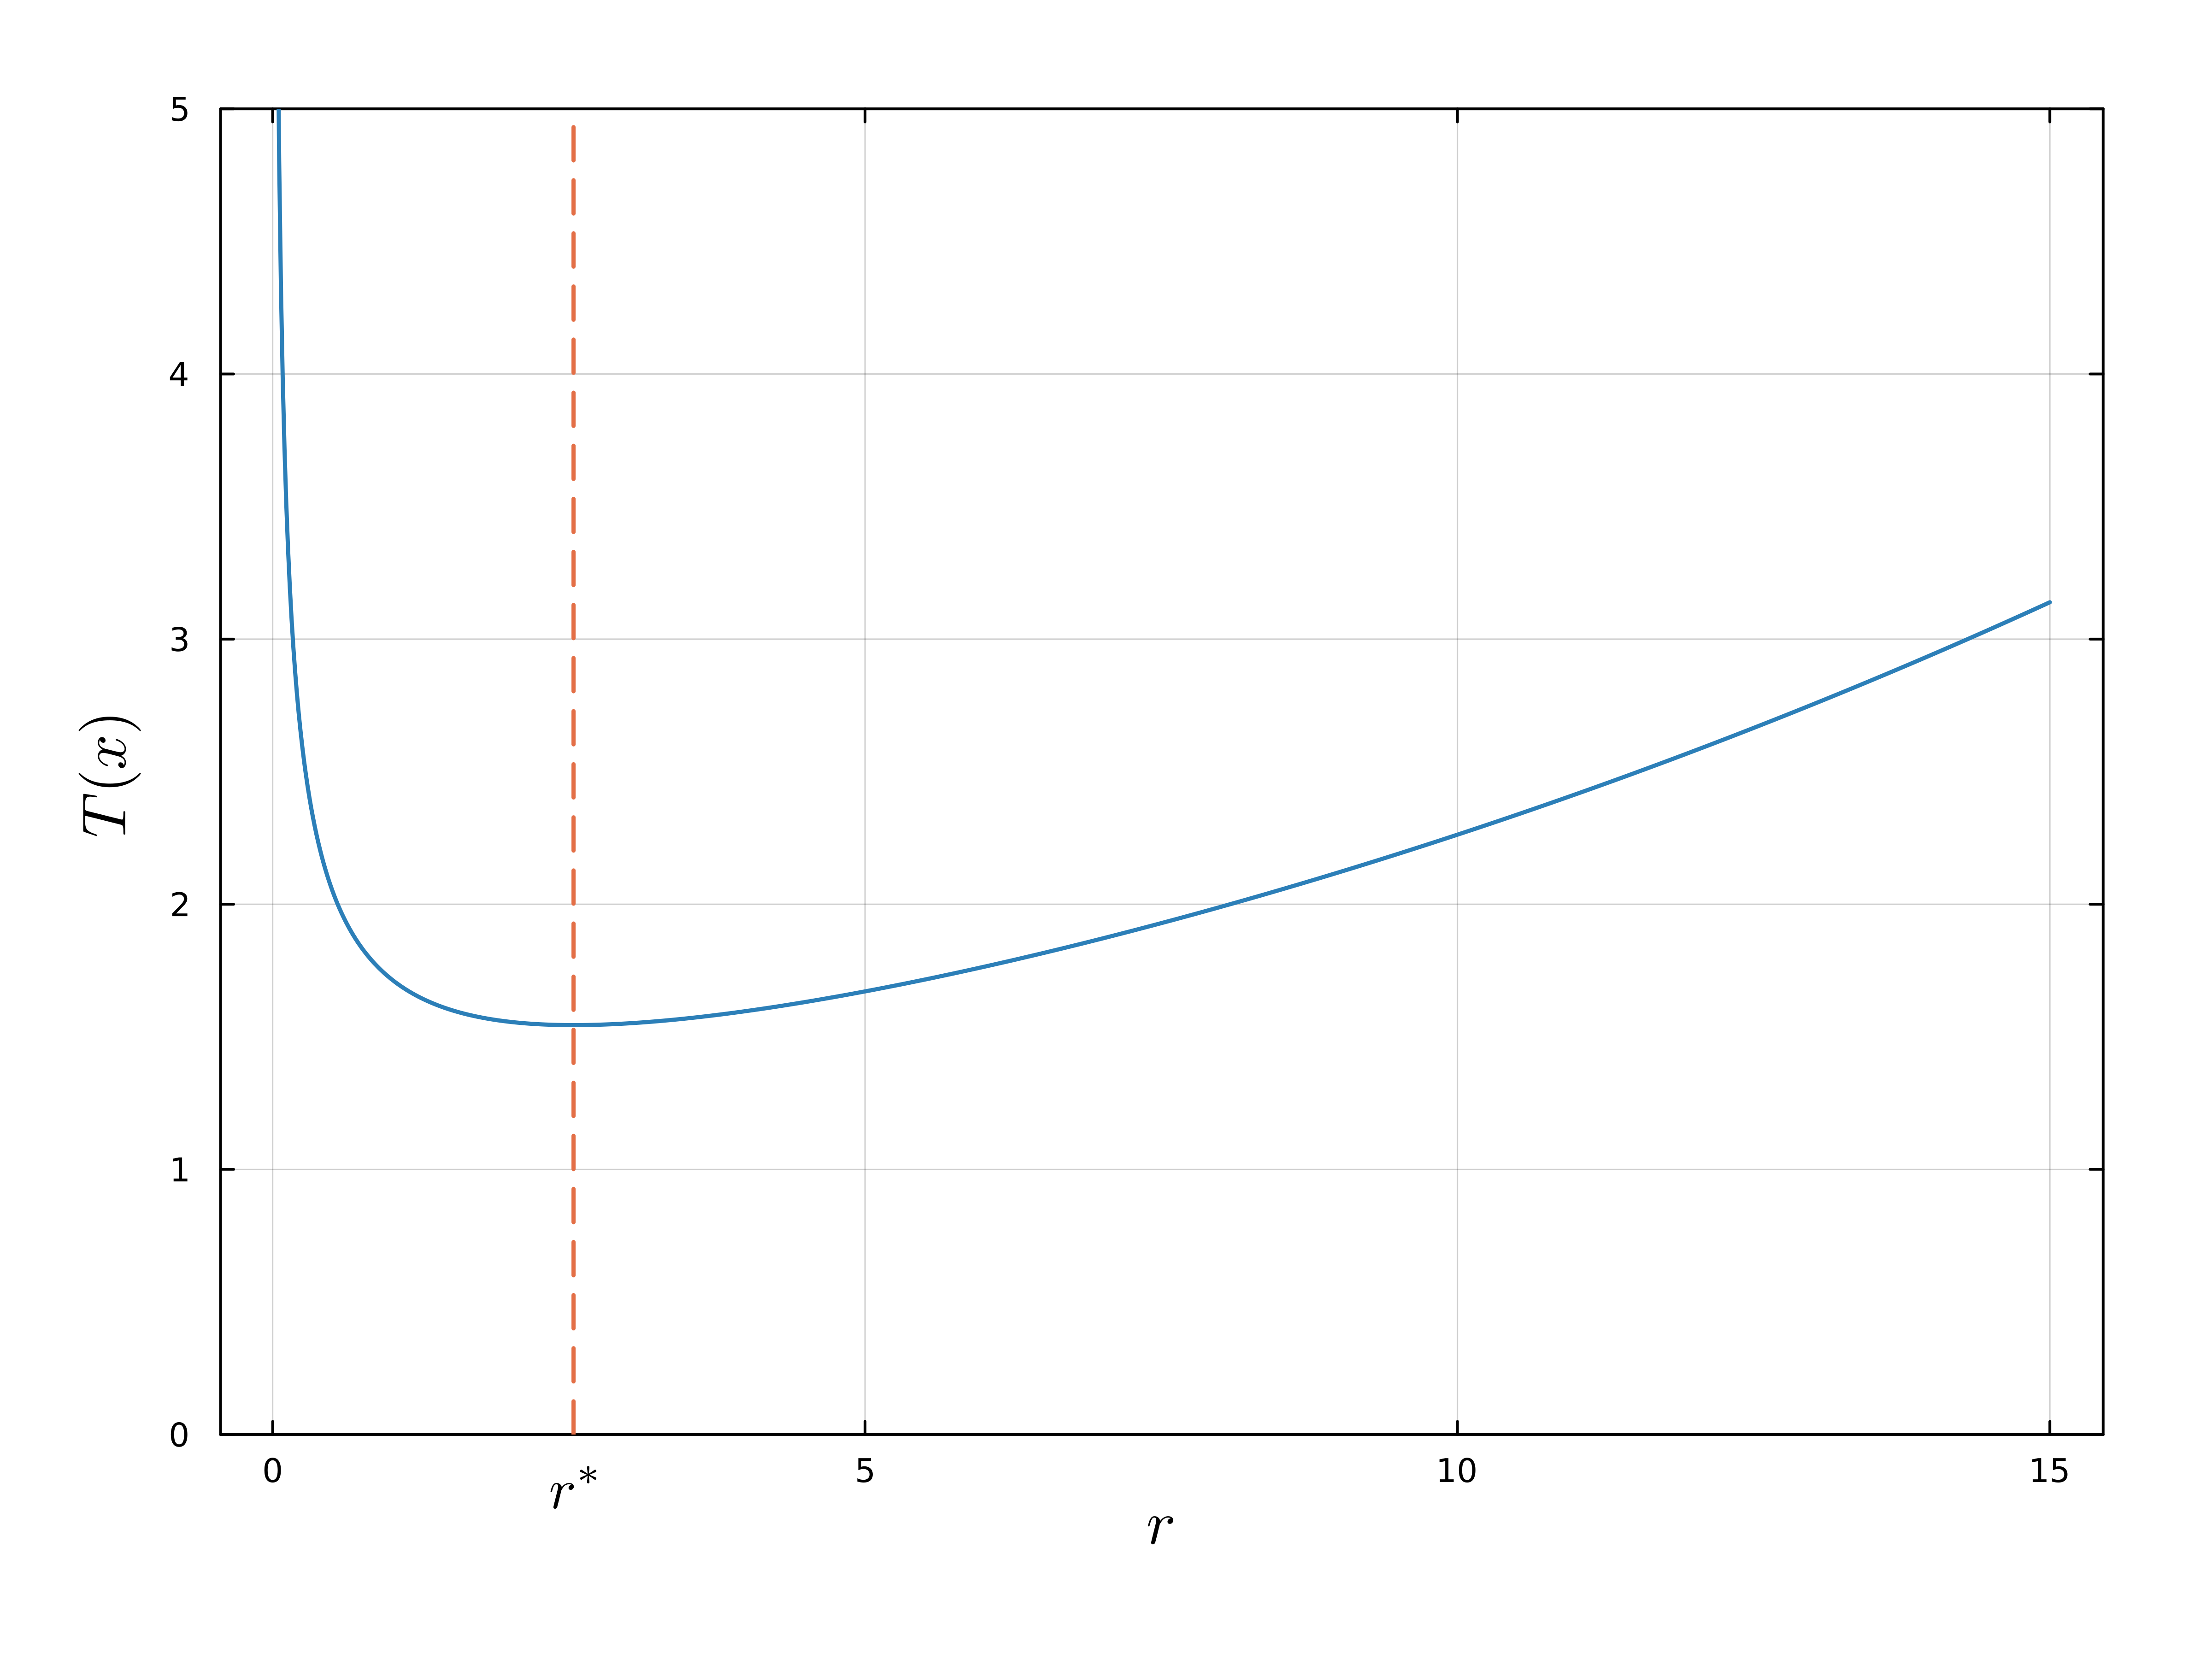

In [2]:
# :==== MFPT AS A FUNCTION OF R ====:
x_0, D = 1, 1

r = range(0.01, 15, 1000)
MFPT = r -> Diffusion.T(x_0, r, D)
r_0 = 2.53962


plt = plot(ylabel=L"T(x)", xlabel=L"r")

plot!(r, MFPT, ylim=(0, 5), legend=:none, c=BLUE1)
vline!([r_0], linestyle=:dash)
annotate!(r_0, -0.2, text(L"r^*", :centre))
savefig("./figures/MFPT_plot.pdf")

plt

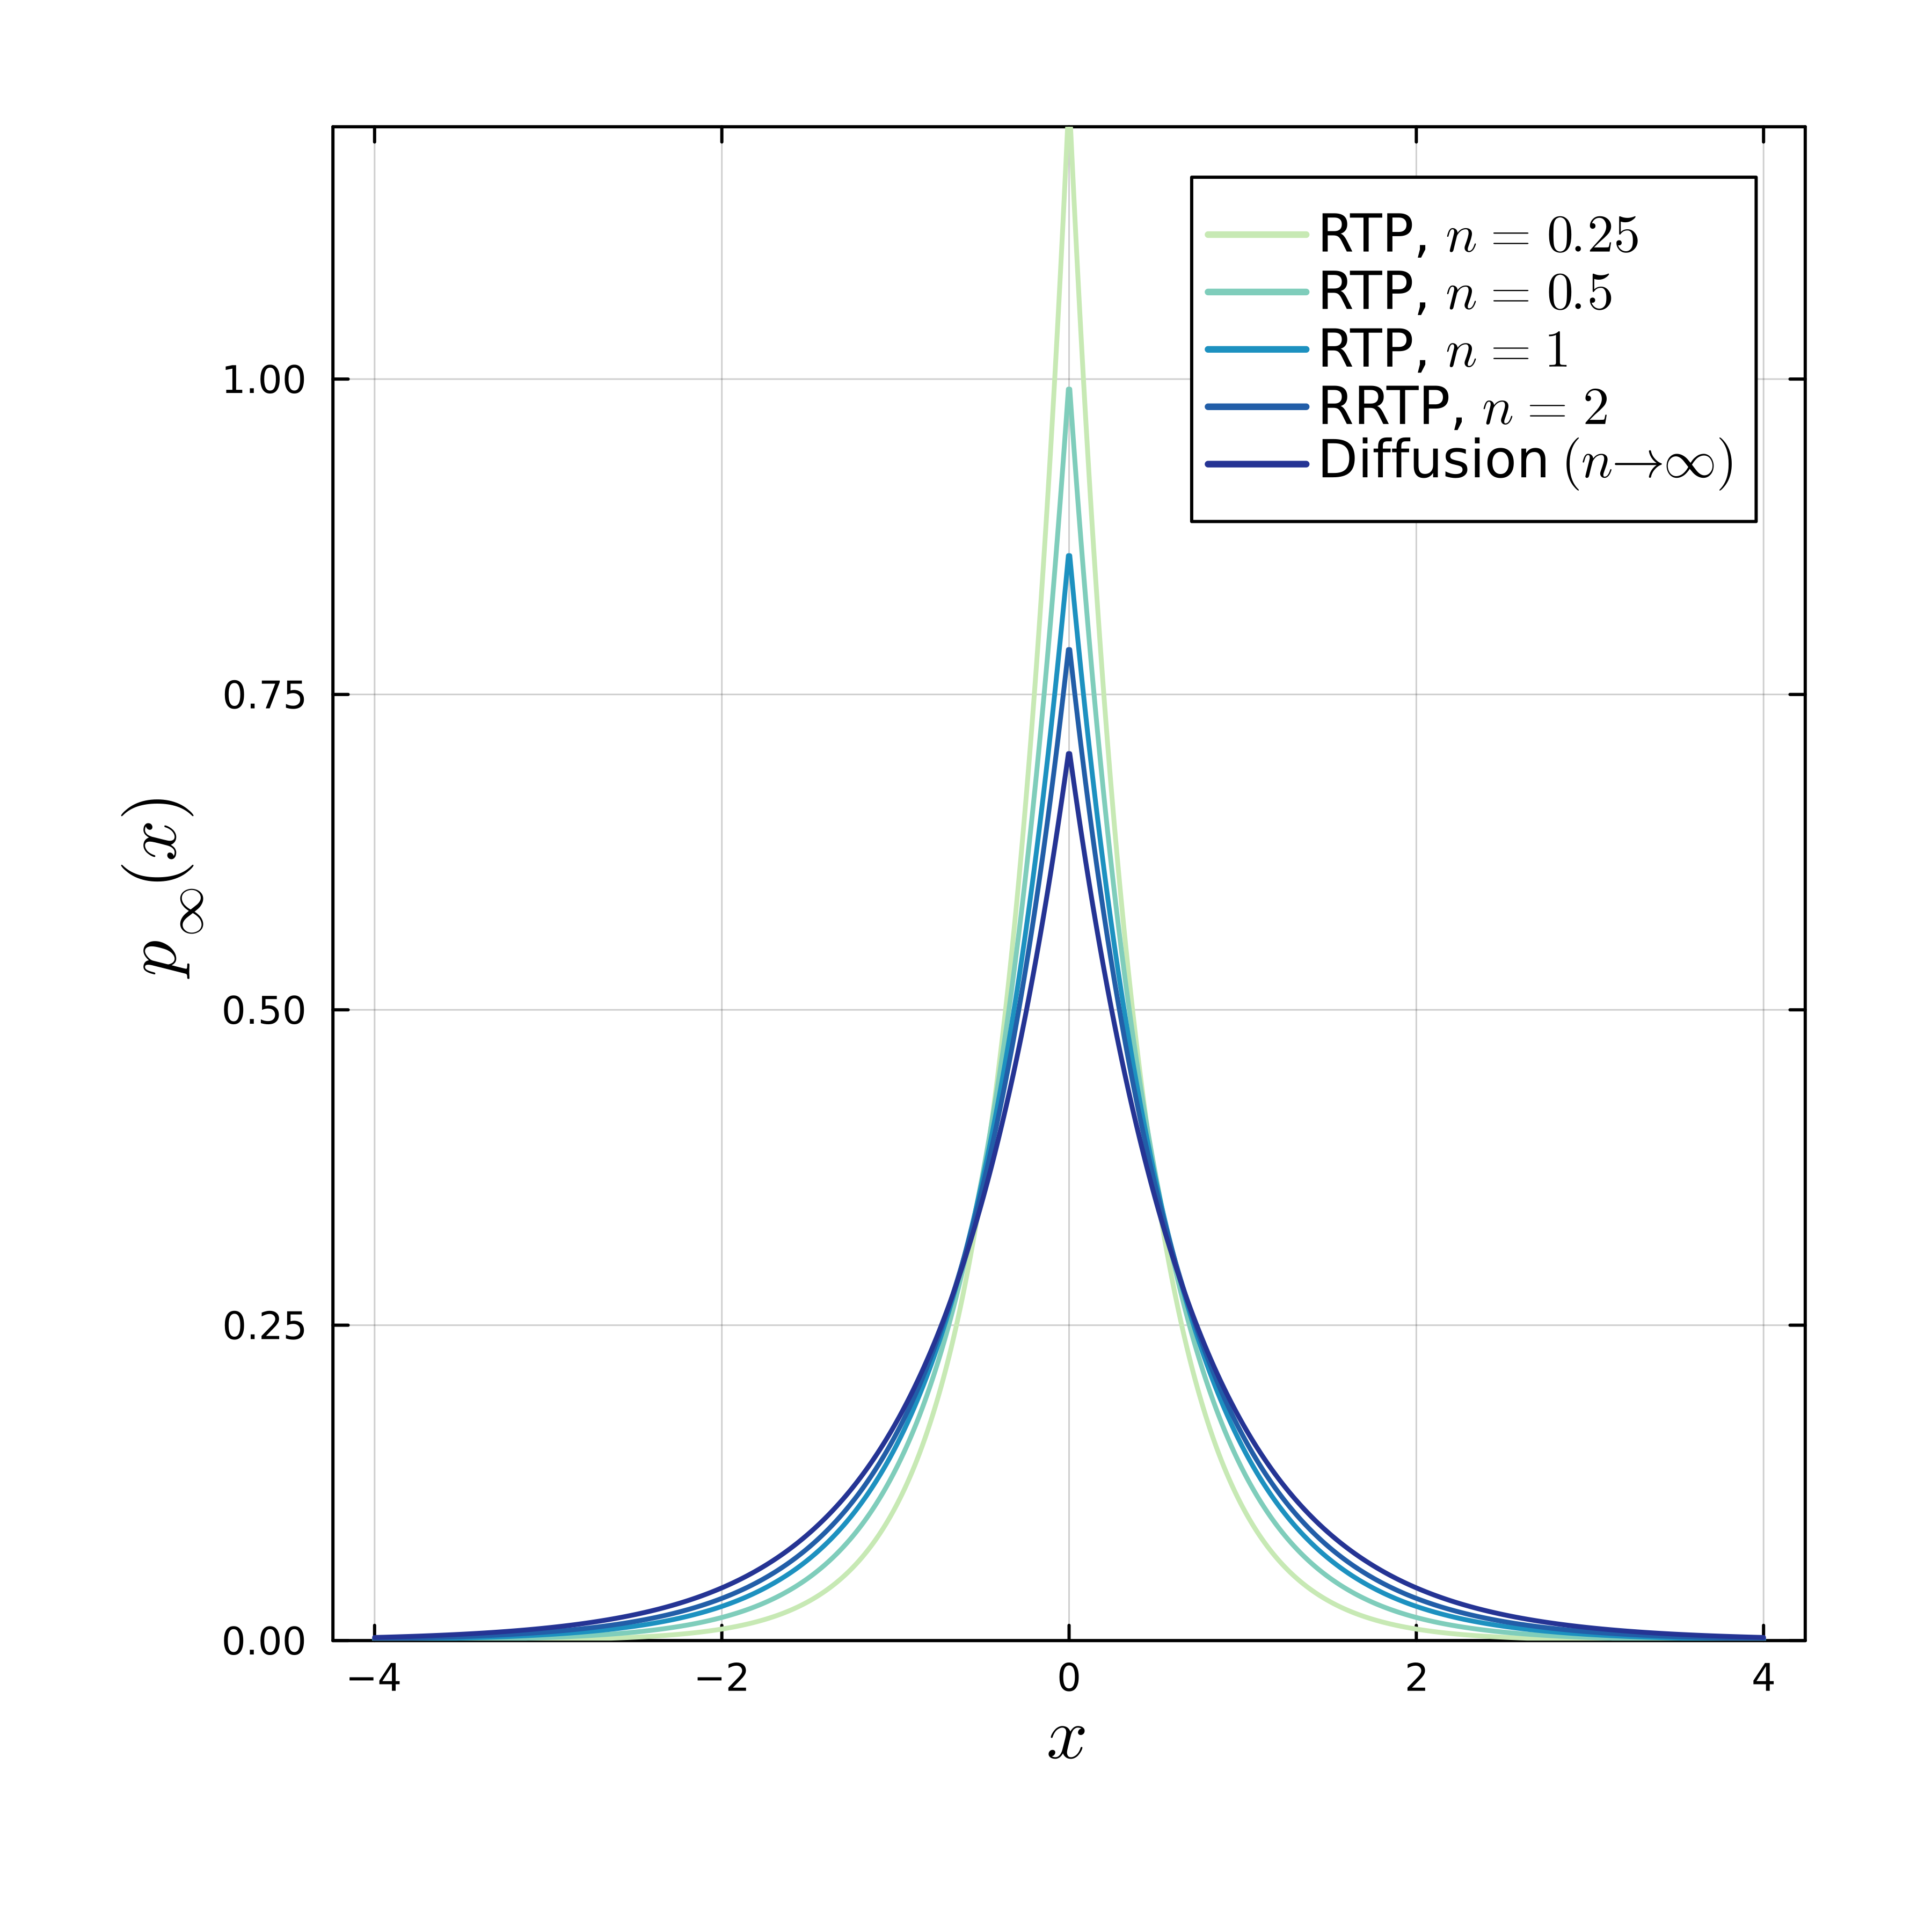

In [115]:
# :==== STEADY-STATE COMPARISON ====:
r, x_0 = 1, 0
γ, v_0 = 1, 1
D = v_0^2/2γ

x = range(-4, 4, 1000)

# Run-and-tumble dynamics
RnT_n(n) = (x̃, r̃, γ̃, ṽ_0) -> RunAndTumble.p_st(x̃, r̃, γ̃*n, ṽ_0 * sqrt(n))

plt = plot(xlabel=L"x", ylabel=L"p_\infty(x)", size=(600, 600))

# Run-and-tumble
plot!(x, RnT_n(0.25).(x, r, γ, v_0), label="RTP, "*L"n=0.25", c=LIGHTGREEN)
plot!(x, RnT_n(0.5).(x, r, γ, v_0), label="RTP, "*L"n=0.5", c=BLUE3)
plot!(x, RnT_n(1).(x, r, γ, v_0), label="RTP, "*L"n=1", c=BLUE2)
plot!(x, RnT_n(2).(x, r, γ, v_0), label="RRTP, "*L"n=2", c=BLUE1)

# Diffusion
plot!(x, Diffusion.p_st.(x, x_0, r, D), label="Diffusion "*L"(n → ∞)", ylim=(0, 1.2), c=DARKBLUE)
#annotate!(0.7, .9, text(L"r = 1, D = 1/2"*'\n'*L"v_0 = \sqrt{n}, \gamma = v_0^2 = n", :left ))
#savefig("./figures/RTP_Steady_State_Comparison_Narrow.pdf")

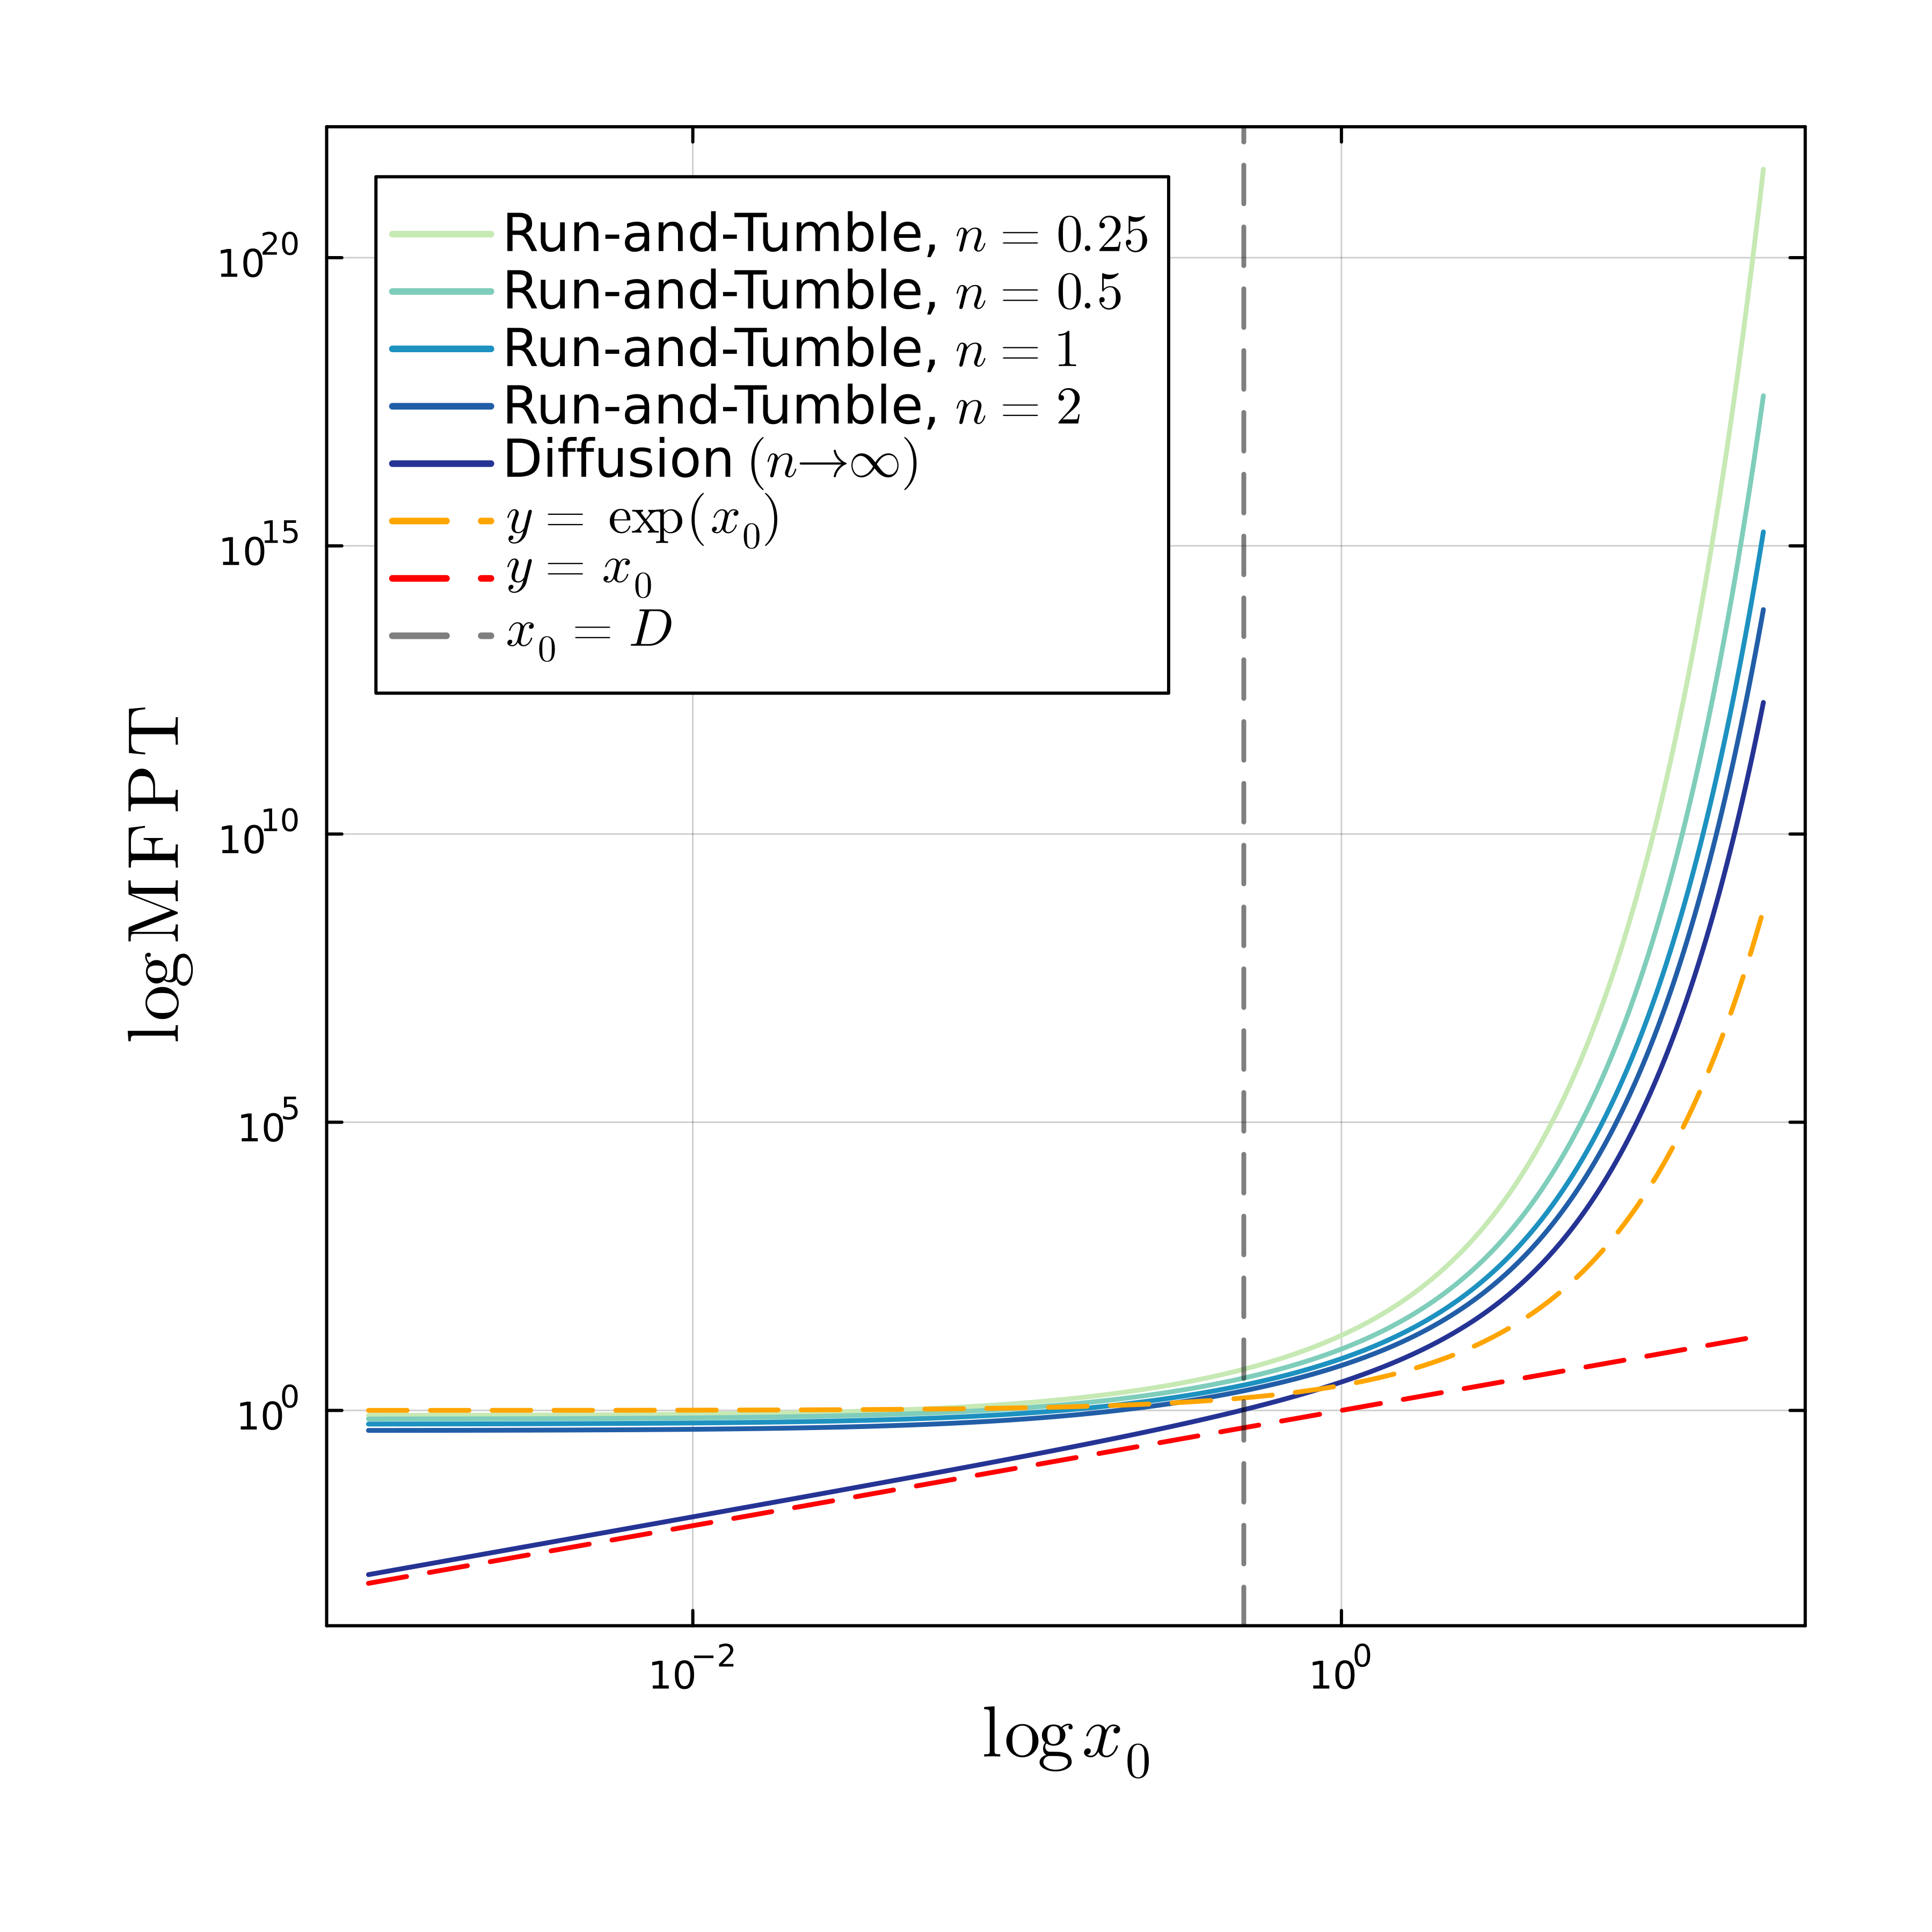

In [88]:
# :==== MFPT Comparison ====:
r = 1
γ, v_0 = 1, 1
D = v_0^2/2γ

#x_0 = 10 .^ (range(log10(0.001), log10(20), 500)) # log-range
x_0 = log_range(0.001, 20, 500)

# Run-and-tumble MFPT
RnT_x = n -> X_r -> RunAndTumble.T(X_r, r, γ*n, v_0*sqrt(n))

mfpt_plot = plot(size=(600, 600), ylabel=L"\log \textrm{MFPT}", xlabel=L"\log x_0", xscale=:log10, yscale=:log10, legend=:topleft)

# Run-and-tumble
plot!(x_0, RnT_x(0.25), label="Run-and-Tumble, "*L"n=0.25", c=LIGHTGREEN)
plot!(x_0, RnT_x(.5), label="Run-and-Tumble, "*L"n=0.5", c=BLUE3)
plot!(x_0, RnT_x(1), label="Run-and-Tumble, "*L"n=1", c=BLUE2)
plot!(x_0, RnT_x(2), label="Run-and-Tumble, "*L"n=2", c=BLUE1)

# Diffusion
plot!(x_0, Diffusion.T.(x_0, r, D), label="Diffusion "*L"(n→∞)", c=DARKBLUE)

# References
plot!(x_0, exp.(x_0), label=L"y=\exp(x_0)", c=:orange, linestyle=:dash)
plot!(x_0, x_0, label=L"y=x_0", c=:red, linestyle=:dash)

# Qualitative change
ϕ = D
vline!([ϕ], linestyle=:dash, c="black", label=L"x_0=D", opacity=0.5)
savefig("./figures/MFPT_Comparison.pdf")
mfpt_plot

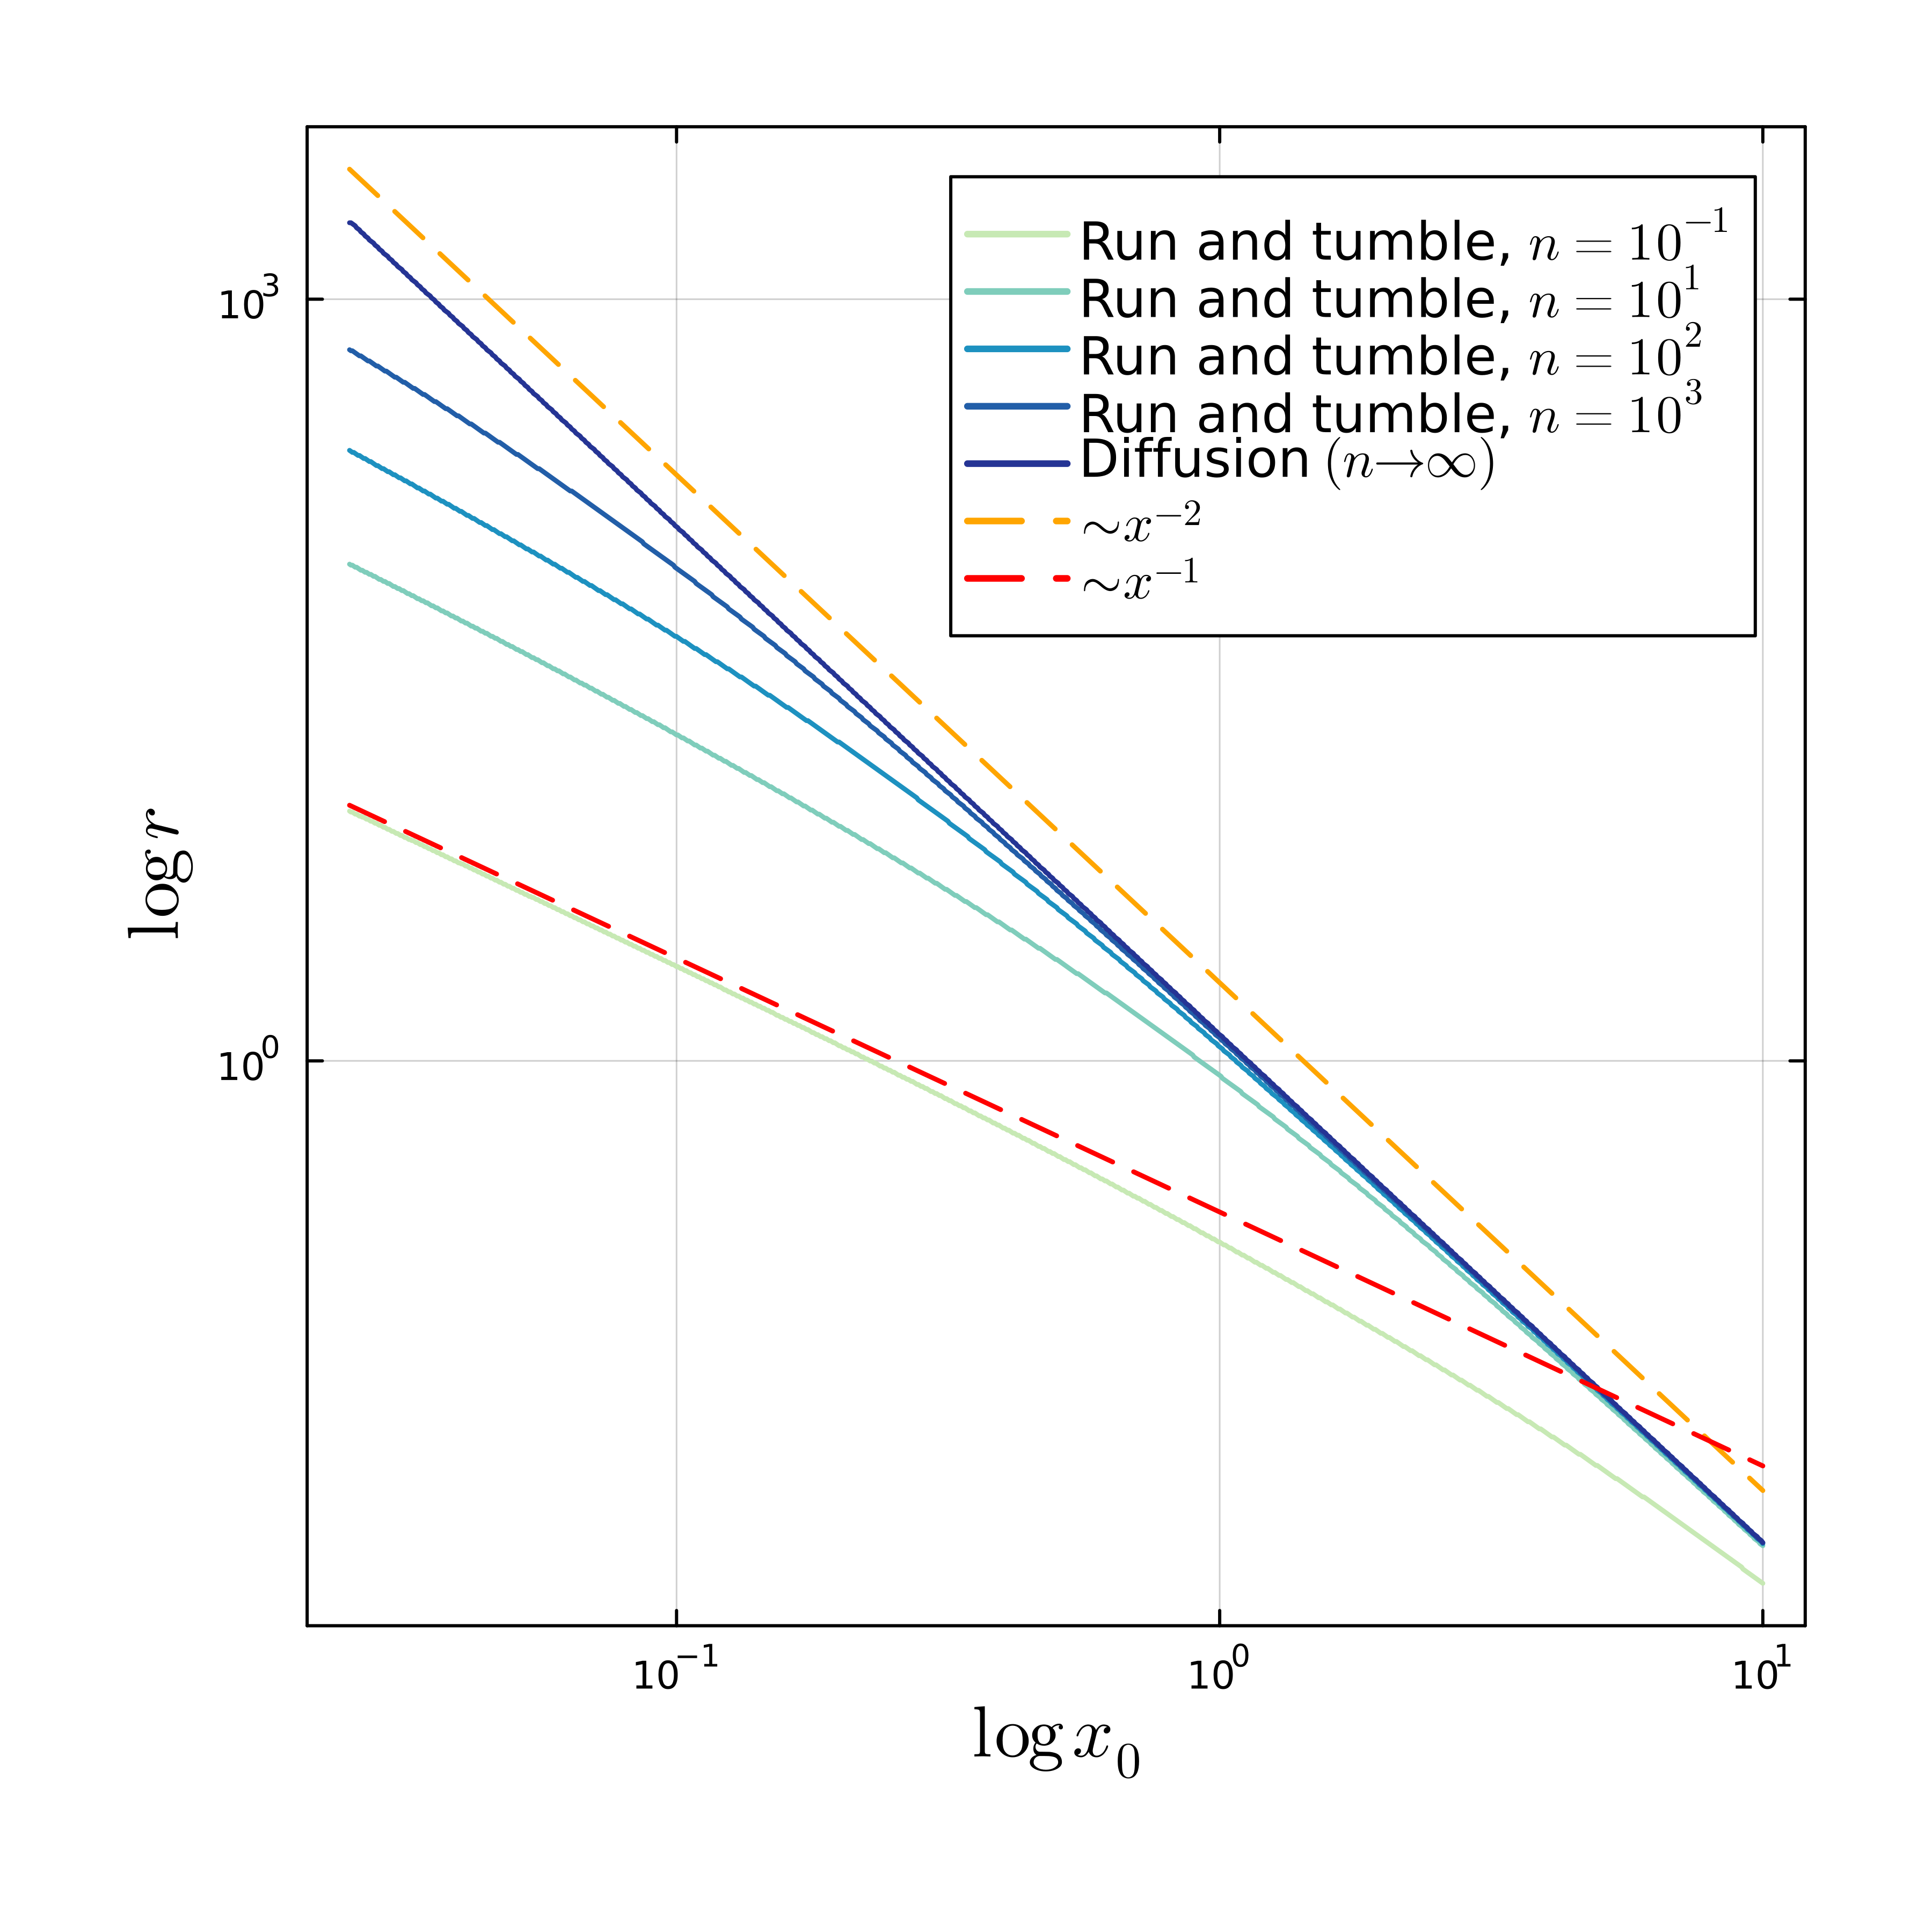

In [99]:
# :==== Optimal r Comparison ====:
γ, v_0 = 1, 1
D = v_0^2/2γ

r_i = log_range(0.00002, 2000, 2000)
x_i = log_range(0.025, 10, 1000)

r_plot = plot(ylabel=L"\log r", xlabel=L"\log x_0", xscale=:log10, yscale=:log10, legend=:topright, size=(600, 600))

# Run-and-tumble
n_i = [.1, 10, 100, 1000]
cols = [LIGHTGREEN, BLUE3, BLUE2, BLUE1]

for i in range(1, 4)
    n, col = n_i[i], cols[i]
    T_r = x -> r -> RunAndTumble.T(x, r, γ * n, v_0 * sqrt(n))
    optimal_r = [argmin(T, r_i) for T in T_r.(x_i)]
    pow = Int(log10(n))
    plot!(x_i, optimal_r, label="Run and tumble, \$n=10^{$pow}\$", c=col)
end

# Diffusion
r̂ = 2.53962
# diff_min = x_0 -> r̂ * D / (x_0^2)
Diff_T_r = x -> r -> Diffusion.T(x, r, D)
diff_optimal_r = [argmin(T, r_i) for T in Diff_T_r.(x_i)]

plot!(x_i, diff_optimal_r, label="Diffusion \$(n → ∞)\$", c=DARKBLUE)

# References
plot!(x_i, x_i .^ -2 .* r̂*0.8 , label=L"∼x^{-2}", c=:orange, linestyle=:dash)
plot!(x_i, x_i .^ -1 .*r̂*0.1, label=L"∼x^{-1}", c=:red, linestyle=:dash)

savefig("./figures/Optimal_r_comparison.pdf")
r_plot

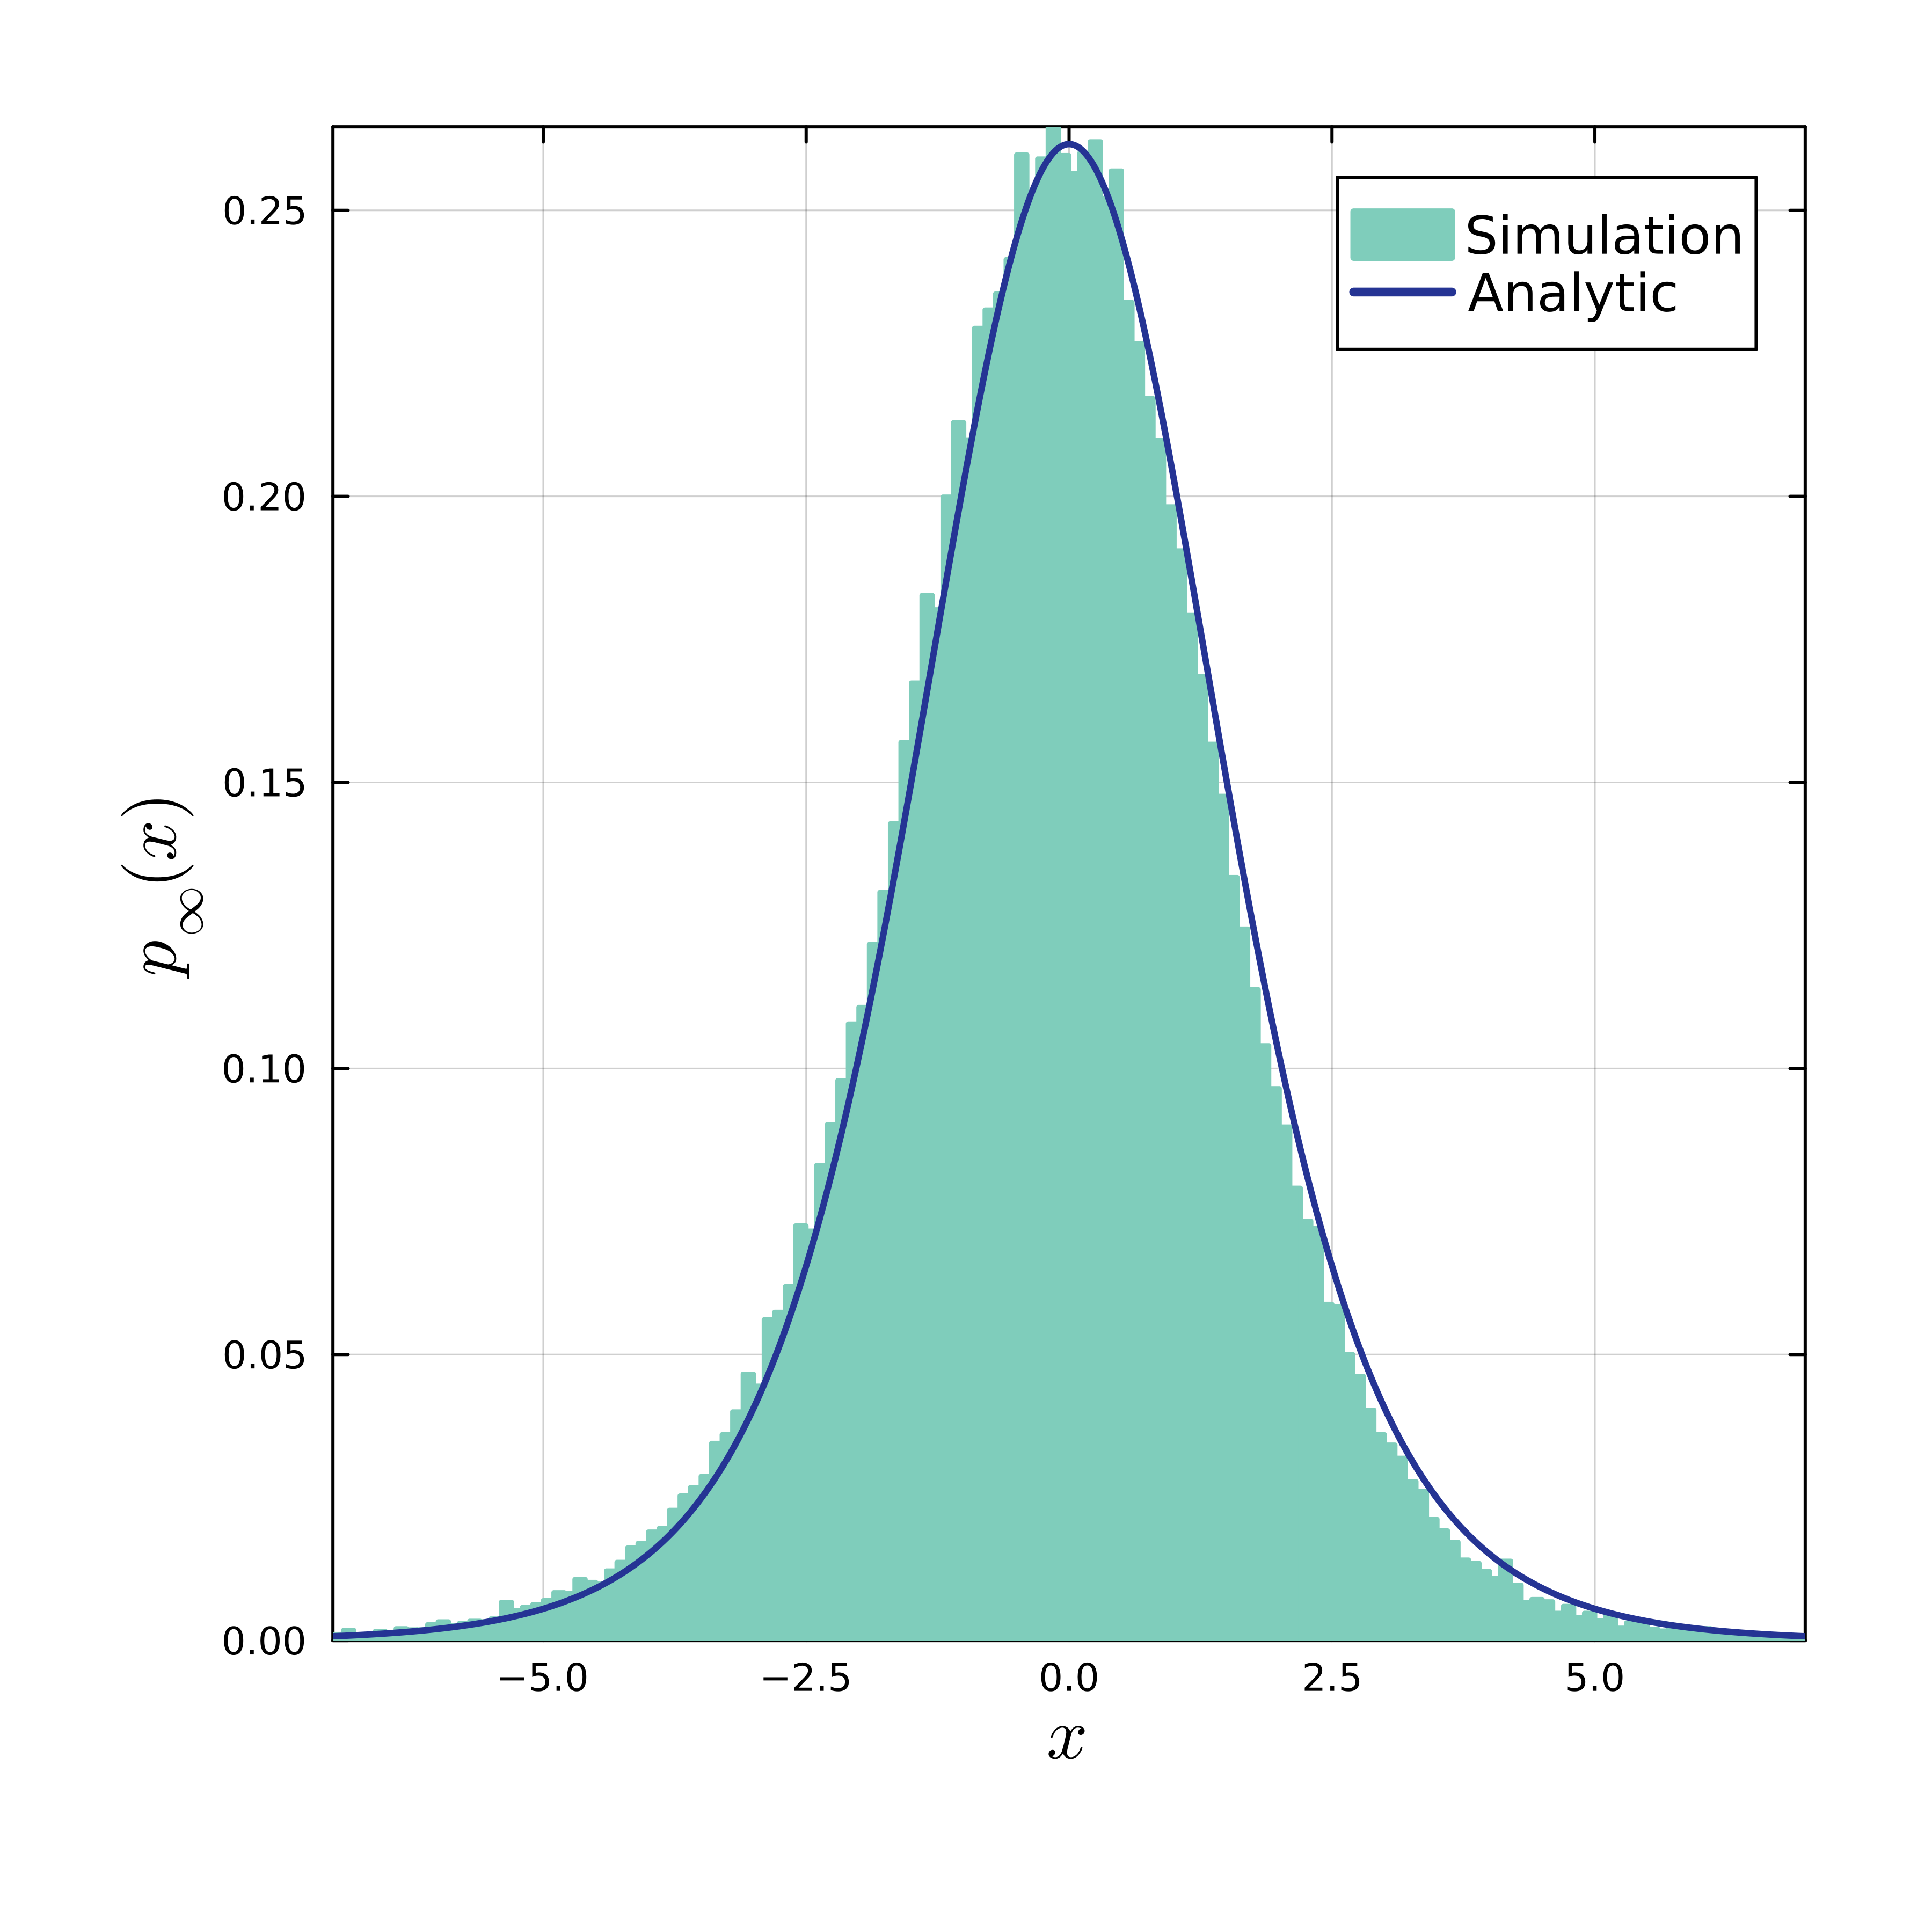

In [81]:
# reset distribution simulations
normal_reset = JSON.parsefile("./data/reset_dist/big_normal_0_1.json")

x = range(-10, 10, 1000)
p_st = x -> Diffusion.p_st_norm(x, 1, 1, 0, 1)

plot(xrange=[-7, 7], xlabel=L"x", ylabel=L"p_\infty(x)", size=(600, 600))
histogram!(normal_reset, c=BLUE3, linecolor=:match, bins=300, normalize=:pdf, label="Simulation")
plot!(x, p_st, c=DARKBLUE, linewidth=2, label="Analytic")
#savefig("./figures/reset_distributions/normal.pdf")

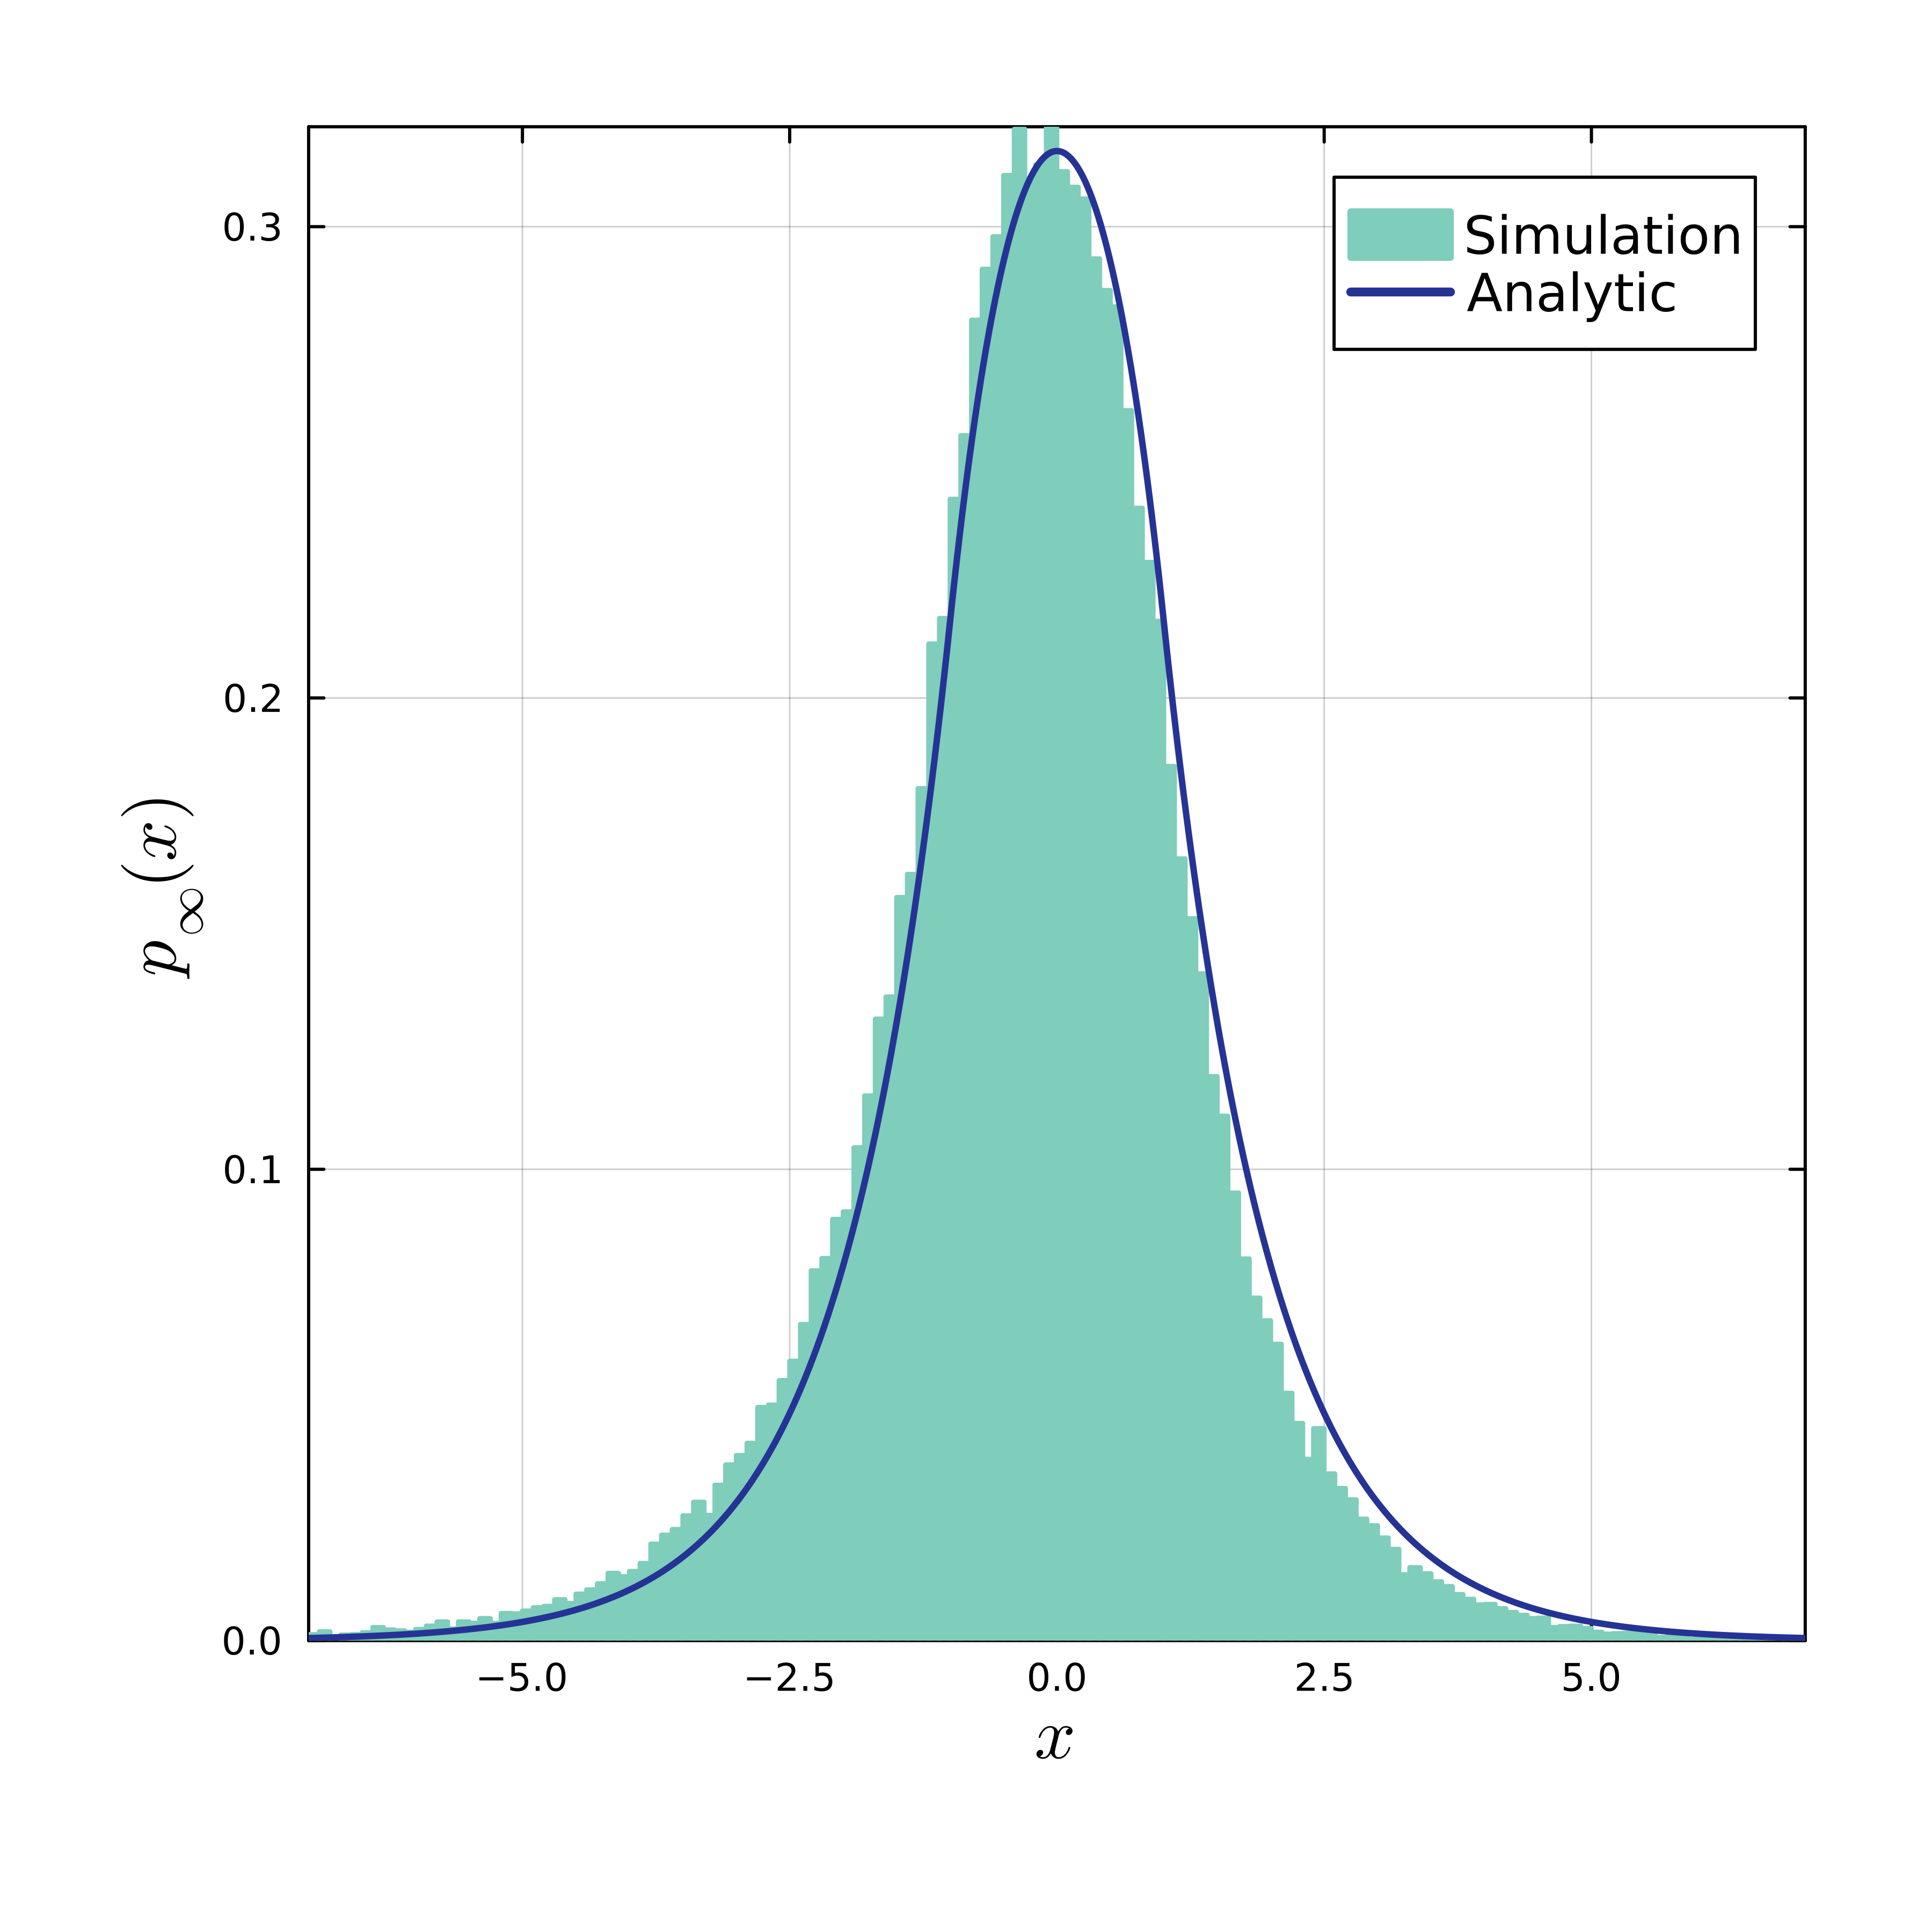

In [123]:
# reset distribution simulations
unif_reset = JSON.parsefile("./data/reset_dist/big_unif_-1_1.json")

x = range(-10, 10, 1000)
p_st = x -> Diffusion.p_st_unif(x, 1, 1, -1, 1)

plot(xrange=[-7, 7], xlabel=L"x", ylabel=L"p_\infty(x)", size=(600, 600))
histogram!(unif_reset, c=BLUE3, linecolor=:match, bins=300, normalize=:pdf, label="Simulation")
plot!(x, p_st, c=DARKBLUE, linewidth=2, label="Analytic")
#savefig("./figures/reset_distributions/uniform.pdf")


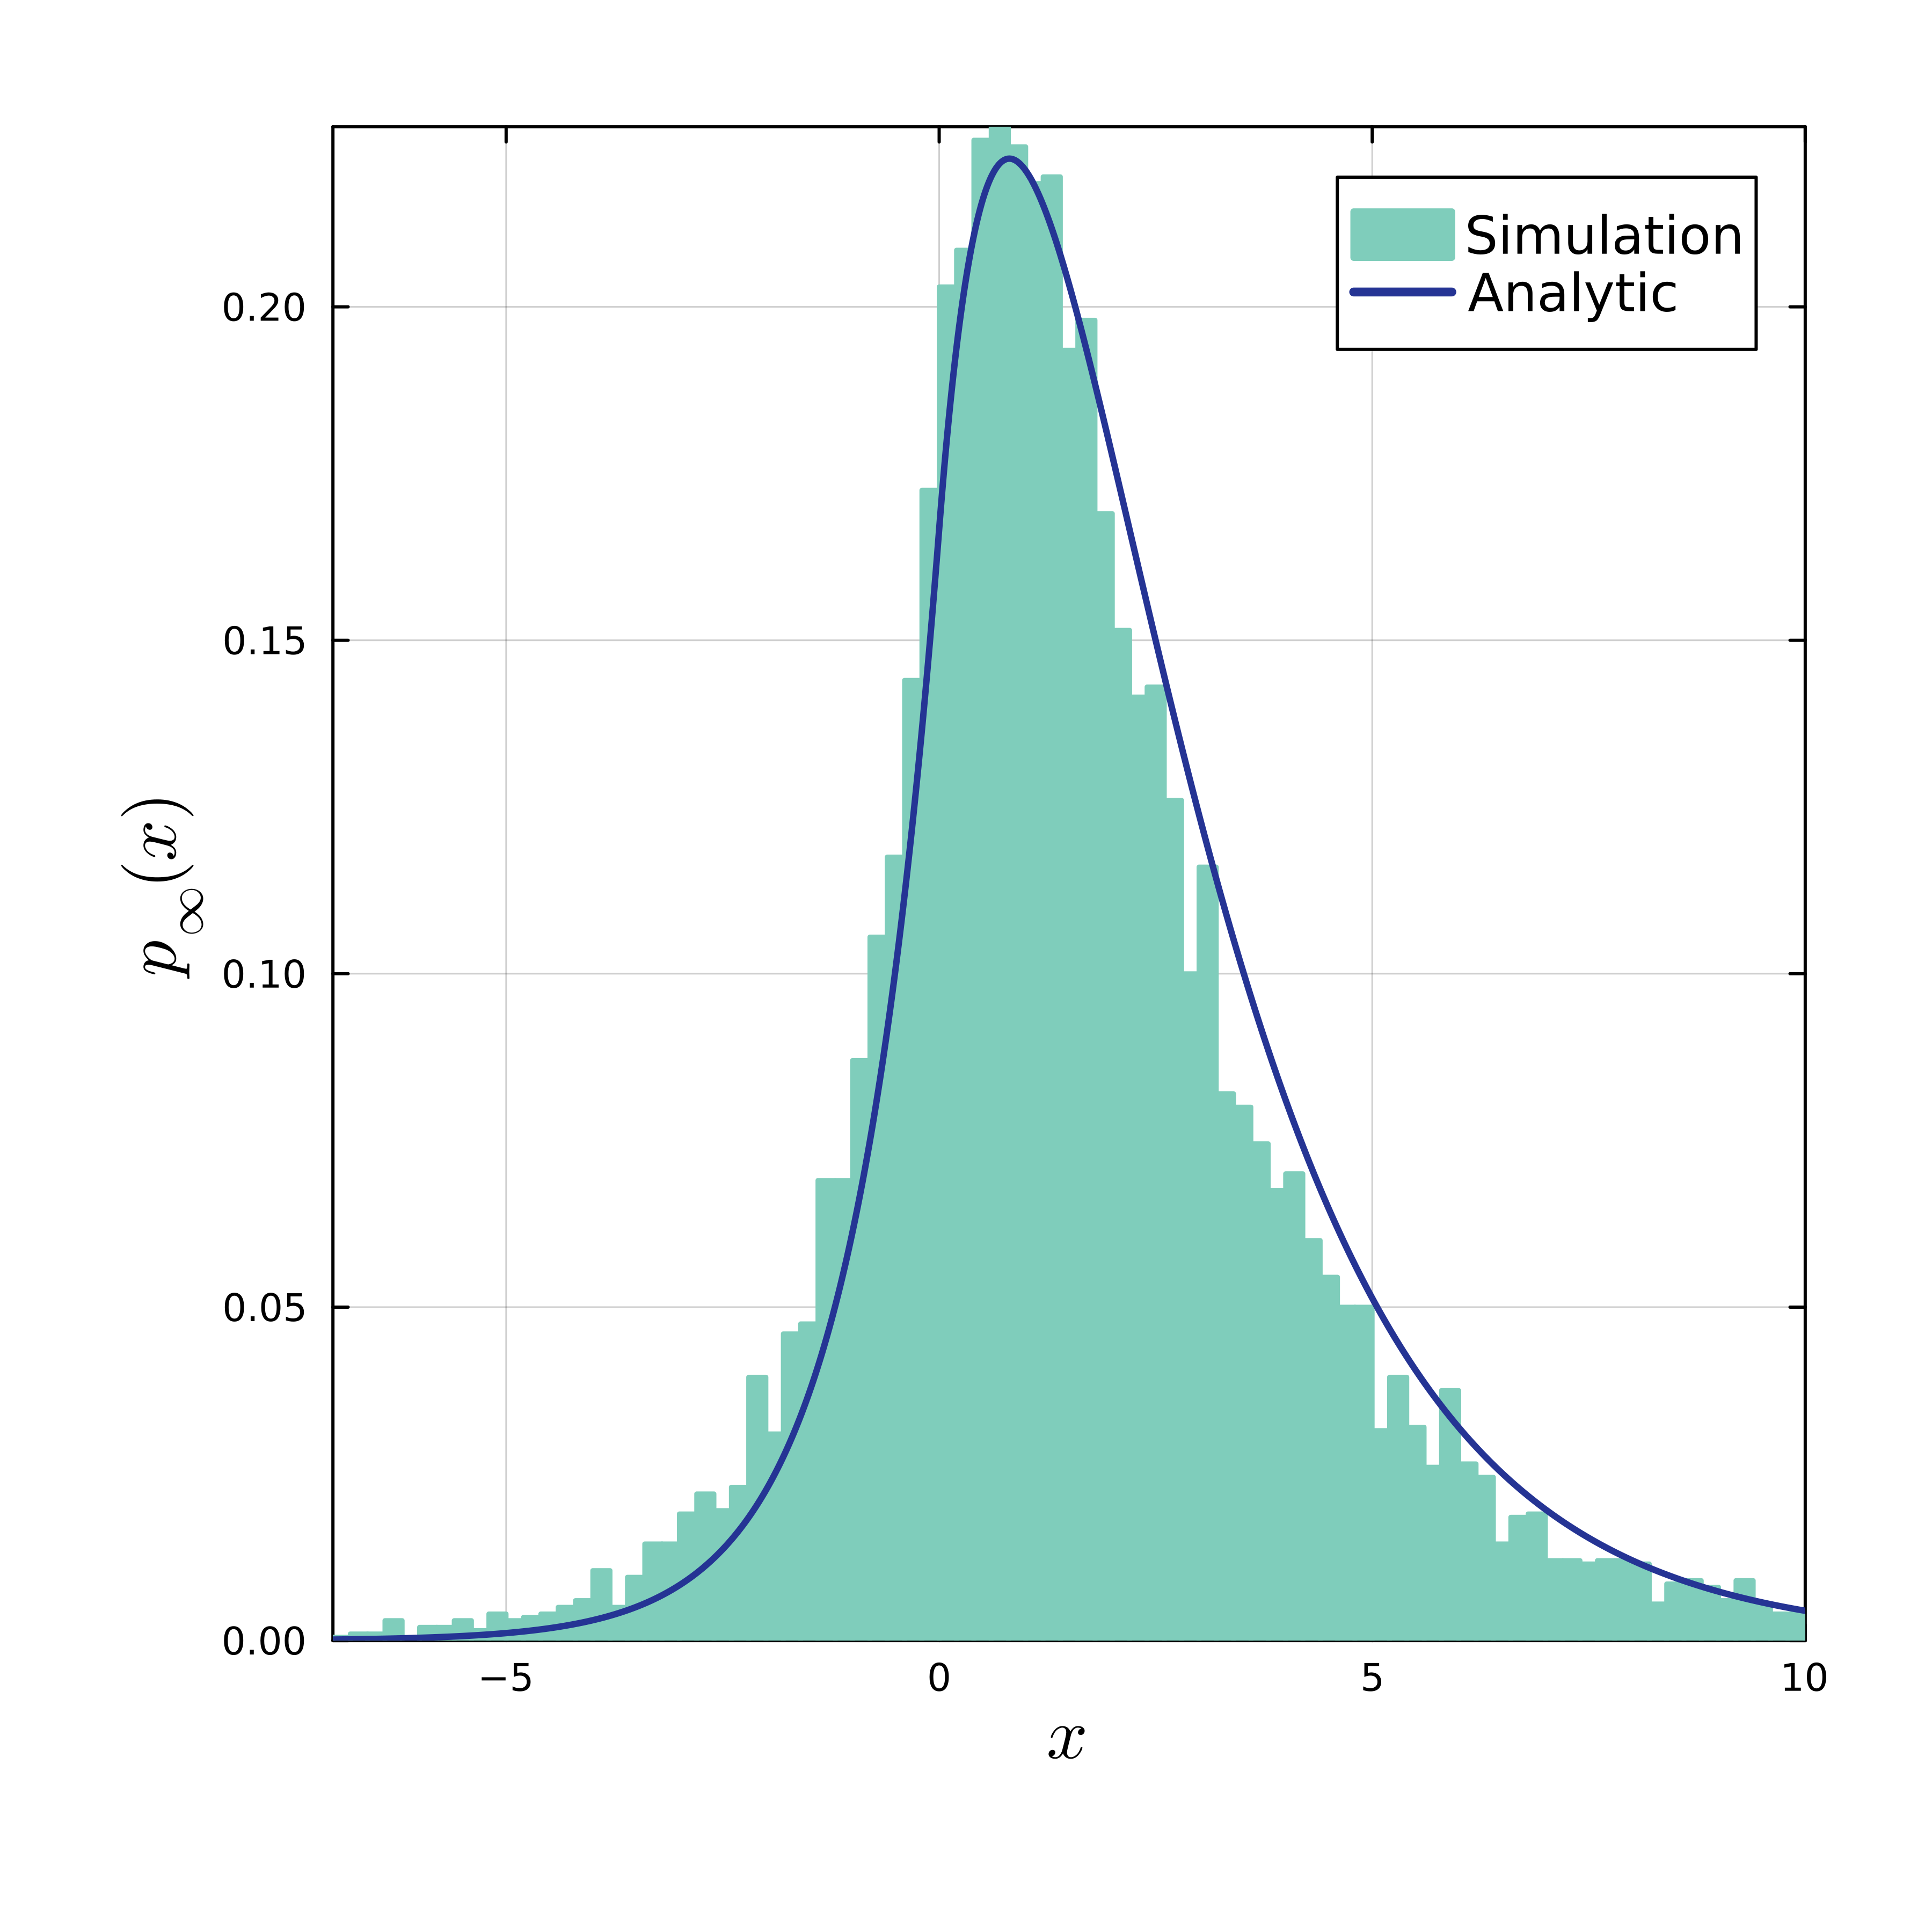

In [84]:
# exponential distribution simulations λ = 0.5
exp_reset = JSON.parsefile("./data/reset_dist/exp_0.5.json")

x = range(-7, 10, 1000)
p_st = x -> Diffusion.p_st_exp(x, 1, 1, 0.5)

plot(xrange=[-7, 10], xlabel=L"x", ylabel=L"p_\infty(x)", size=(600, 600))
histogram!(exp_reset, c=BLUE3, linecolor=:match, bins=200, normalize=:pdf, label="Simulation")
plot!(x, p_st, c=DARKBLUE, linewidth=2, label="Analytic")
#savefig("./figures/reset_distributions/exp_0.5.pdf")

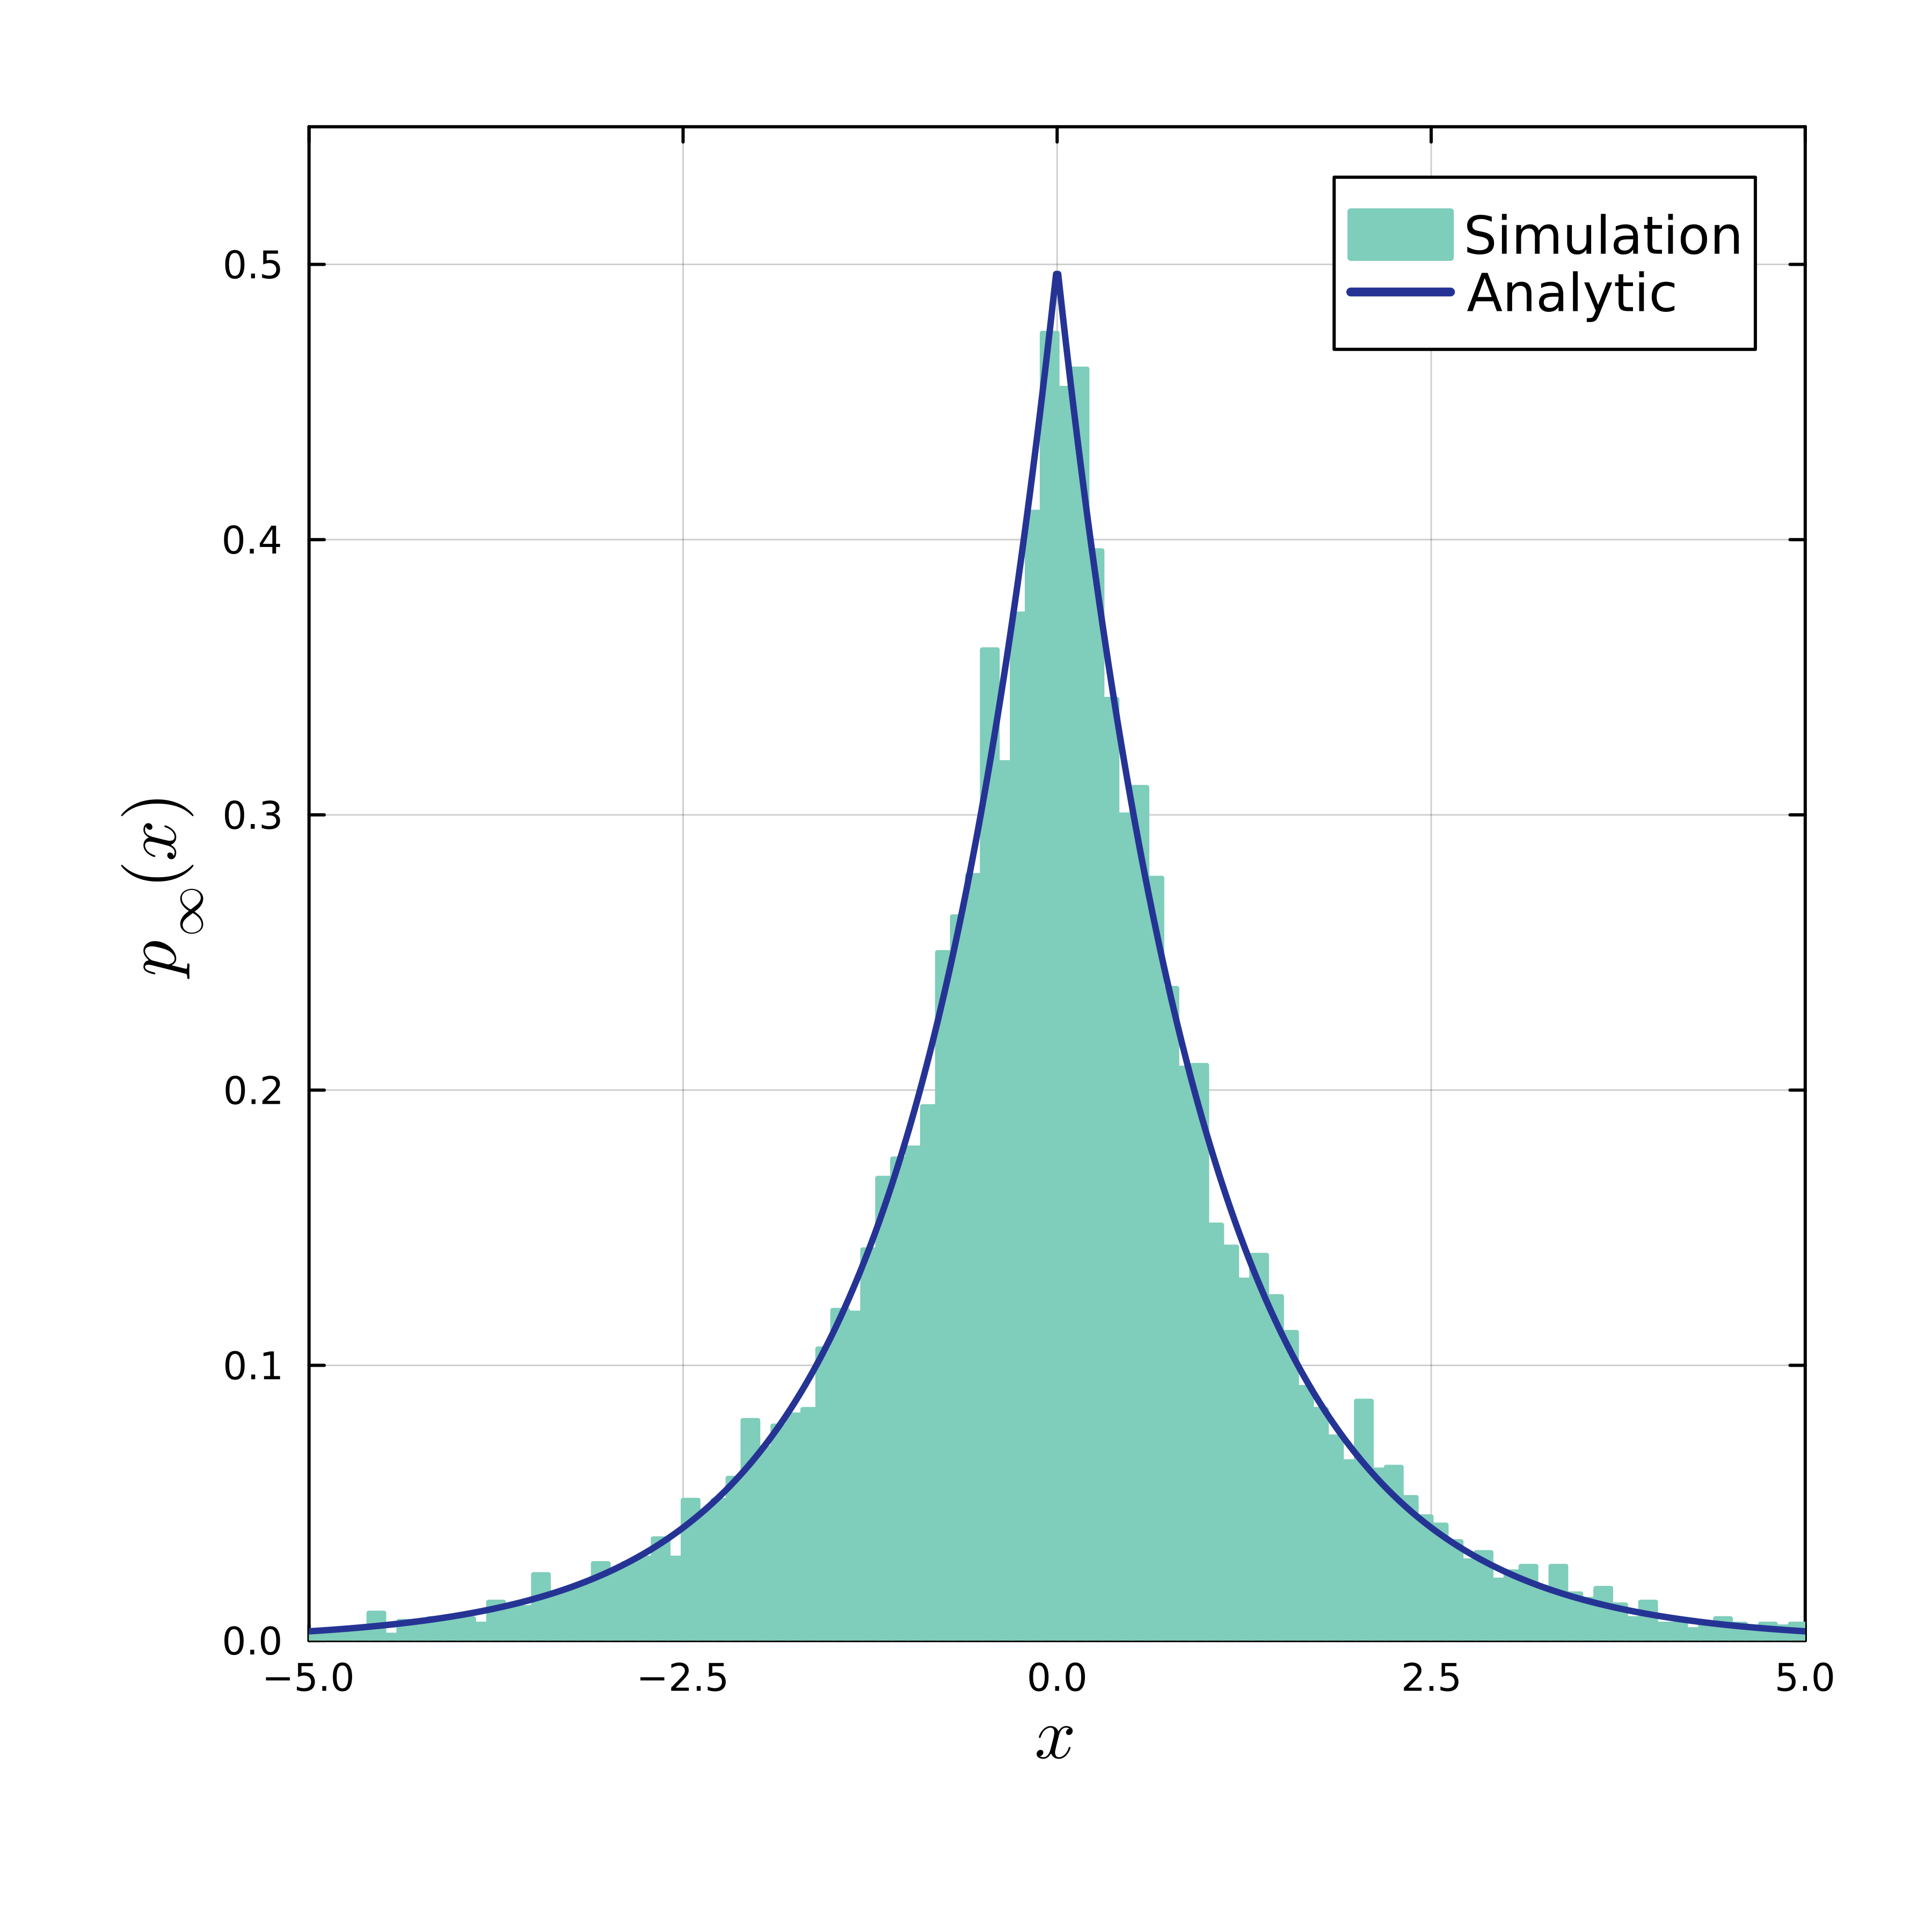

In [124]:
# steady-state distribution
steady_state = JSON.parsefile("./data/reset_dist/steady_state.json")

x = range(-7, 7, 1000)
p_st = x -> Diffusion.p_st(x, 0, 1, 1)

plot(xrange=[-5, 5], yrange=[0, .55], xlabel=L"x", ylabel=L"p_\infty(x)", size=(600, 600))
histogram!(steady_state, c=BLUE3, linecolor=:match, bins=200, normalize=:pdf, label="Simulation")
plot!(x, p_st, c=DARKBLUE, linewidth=2, label="Analytic")
#savefig("./figures/Steady_State_Simulated.pdf")

In [132]:
# two-point steady-state distribution
steady_state = JSON.parsefile("./data/reset_dist/steady_state_two_points.json")

x = range(-7, 7, 1000)
p_st = x -> (Diffusion.p_st(x, 1, 1, 1) + Diffusion.p_st(x, -1, 1, 1))/2

plot(xrange=[-5, 5], yrange=[0, .55], xlabel=L"x", ylabel=L"p_\infty(x)", size=(600, 600))
histogram!(steady_state, c=BLUE3, linecolor=:match, bins=200, normalize=:pdf, label="Simulation")
plot!(x, p_st, c=DARKBLUE, linewidth=2, label="Analytic")
#savefig("./figures/Steady_State_Two_Points_Simulated.pdf")

"/Users/benlejeune/PycharmProjects/Imperial/Y2_Research/Julia_figures/figures/Steady_State_Two_Points_Simulated.pdf"